<a href="https://colab.research.google.com/github/git07Sandesh/Pytorch-Practice/blob/main/Pytorch_workflow(regression_tasks).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

import matplotlib.pyplot as plt



#DAta PReparation And Loading
* Can have anything as data: Excel spreadsheets, images, videos, text, DNA, audio (anything)

* But everything should be converted to Numerical representations.

* Build a model that learns based on that data.




#LEts use Linear Regression MOdel from this:
We will use Linear Regression for now:

In [ ]:

weight = 0.7
bias = 0.3
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

#Data Splitting
Three DataSets: Training Sets(learn), Validation Sets(practice), Testing Sets(final)



In [ ]:
#Creating a train test split.
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

#Or use scikit learn's train test split.


(40, 40, 10, 10)

#Now We need to visualize the data.
We can create a function so that we can visualize the data for multiple instances.


In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))
  #Plotting training data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  #Plotting test data
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14})

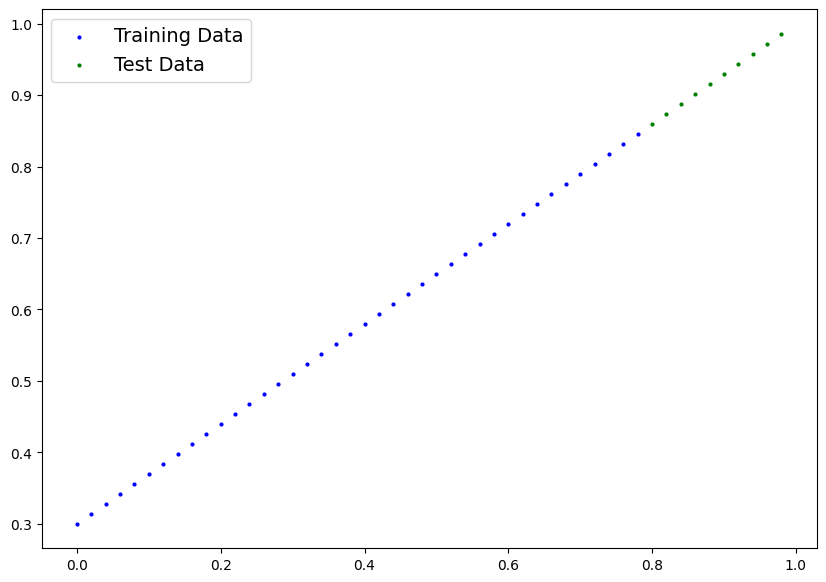

In [ ]:
plot_predictions()

In [ ]:
#Now we will be building Pytorch model:
from torch import nn

class LinearRegressionModel(nn.Module): # nn.Module is the base class for neural network
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
print(X_test)

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])


In [ ]:
#Making PRedictions using our model

with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

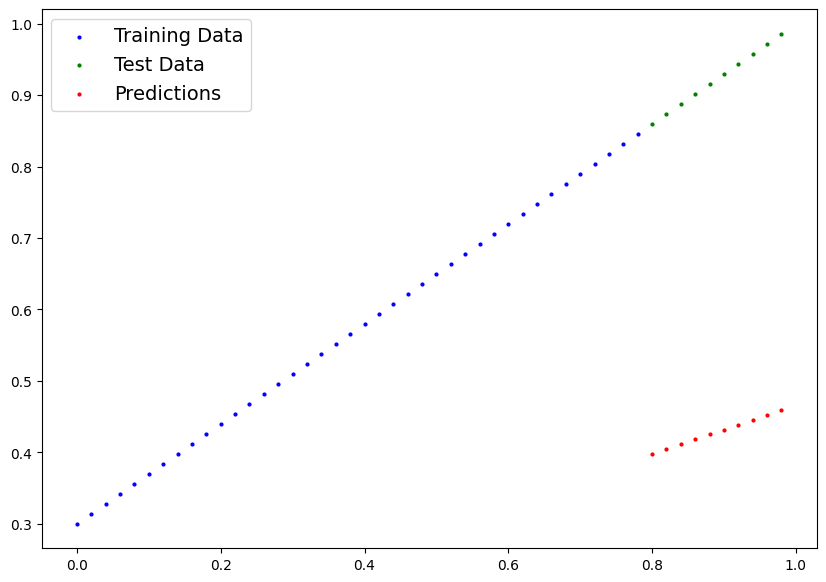

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
#SEtting up an optimizer and loss function:

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) #Like a coach who adjusts model's weight, lr = learning rate (dont set too less and too high)





#Building a training loop:
#STEPS:
0. Loop through the data.
1. Forward Pass(this involves data moving through our model's forward() function) - also called forward propagation:
2. Calculate the loss function and compare this with ground truth table.
3. Optimizer zero grad
4. Backward loss propagation
5. Optimizer step

In [ ]:
epochs = 30 #One loop through the data; #ANother hyperparameter

for epoch in range(epochs):
  model_0.train() ##Setting the model to training mode: Opposite of inference mode:

  #1. Forward pass
  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backward propagation:
  loss.backward()

  #5. Step the optimizer
  optimizer.step()

#Testing:
  model_0.eval() ##Turns off the gradient tracking
  with torch.inference_mode():
    #Still do a forward pass
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)
    print(f"Test Loss: {test_loss}")
  if(epoch % 10 == 0):
    print(f'Epoch: {epoch} | loss: {loss} | Test Loss:{test_loss}')




Loss: 0.008932482451200485
Test Loss: 0.005023092031478882
Epoch: 0 | loss: 0.008932482451200485 | Test Loss:0.005023092031478882
Loss: 0.0025885067880153656
Test Loss: 0.008447891101241112
Loss: 0.008932482451200485
Test Loss: 0.005023092031478882
Loss: 0.0025885067880153656
Test Loss: 0.008447891101241112
Loss: 0.008932482451200485
Test Loss: 0.005023092031478882
Loss: 0.0025885067880153656
Test Loss: 0.008447891101241112
Loss: 0.008932482451200485
Test Loss: 0.005023092031478882
Loss: 0.0025885067880153656
Test Loss: 0.008447891101241112
Loss: 0.008932482451200485
Test Loss: 0.005023092031478882
Loss: 0.0025885067880153656
Test Loss: 0.008447891101241112
Loss: 0.008932482451200485
Test Loss: 0.005023092031478882
Epoch: 10 | loss: 0.008932482451200485 | Test Loss:0.005023092031478882
Loss: 0.0025885067880153656
Test Loss: 0.008447891101241112
Loss: 0.008932482451200485
Test Loss: 0.005023092031478882
Loss: 0.0025885067880153656
Test Loss: 0.008447891101241112
Loss: 0.0089324824512004

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

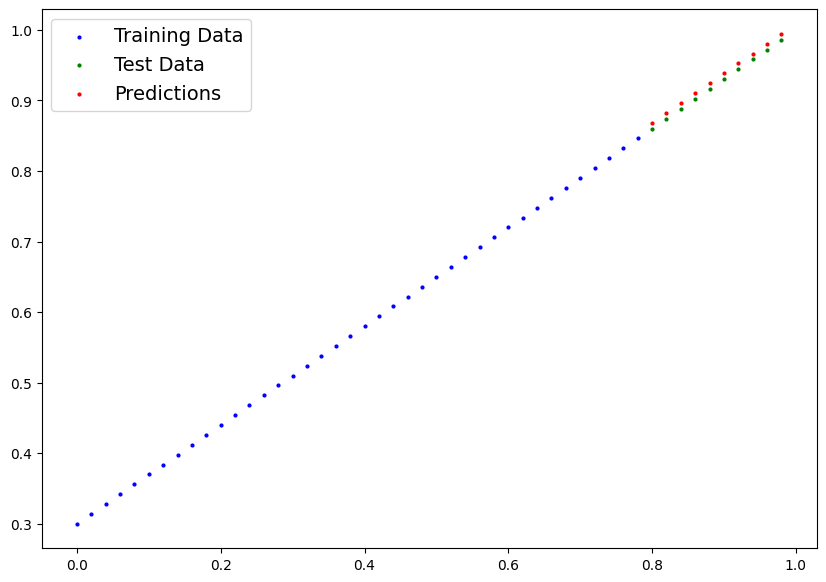

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

#Now lets save our model:
# torch.save() - save a Pytorch Object in Python's pickle format
#torch.load() - load a saved Pytorch Object
#torch.nn.Module.load_state_dict(): load a model's saved state dictionary


In [ ]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
#Creatting a model save path
MODEL_NAME = "01_pytorch_workflow.pth"
model_save_path = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {model_save_path}")
torch.save(obj=model_0.state_dict(), f=model_save_path)
#

Saving model to: models/01_pytorch_workflow.pth


In [ ]:
#loading the saved model. So notice that we only saved the model's learned parameter. SO we need to create a new instance of the model and then load the saved 'state_dict()'

model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=model_save_path))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#Make some predictions nowL:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds


tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
#Putting Everything Back together:

import torch
import matplotlib.pyplot as plt


#Making or loading a data.
weight = 0.7
bias = 0.3

X = torch.arange(0, 2, 0.01).unsqueeze(dim=1)
y = weight * X + bias

print(f"X: {X[:10]}")
print(f"y: {y[:10]}")



X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280],
        [0.3350],
        [0.3420],
        [0.3490],
        [0.3560],
        [0.3630]])


In [ ]:
X.size()

torch.Size([200, 1])

In [ ]:
#Split the data: can use sklearn's train testt split or can do it mannually:
X_train, X_test = X[:150], X[150:]
y_train, y_test = y[:150], y[150:]


(150, 150, 50, 50)

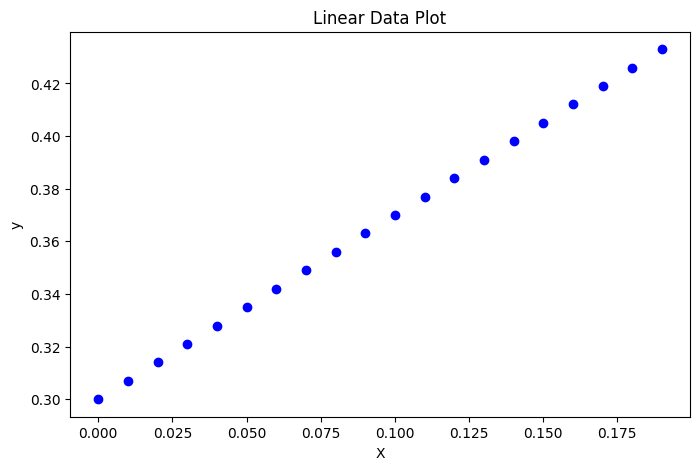

In [ ]:
#Plotting the data to see what it looks like: Use gpt for better visualization techniques for now:
import matplotlib.pyplot as plt

def plot_data(X, y, title="Linear Data Plot"):
    """
    Plots the given X and y data points.

    Parameters:
    - X (list or array-like): Independent variable values
    - y (list or array-like): Dependent variable values
    - title (str): Title of the plot
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()

plot_data(X[:20], y[:20]) #Just taking 20 data points to make it stand out:



In [ ]:
#Building a model:
class LinearRegressionModelV2(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = torch.nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)



In [ ]:
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.4668]])),
              ('linear_layer.bias', tensor([0.2549]))]))

In [ ]:
#Now we need to train the model:
# But First let's set the cost function and optimizer

loss_fn1 = torch.nn.MSELoss()
optimizer1 = torch.optim.SGD(params=model_1.parameters(),lr = 0.01)

In [ ]:
#Training Loop:
torch.manual_seed(42)
epochs = 500

for epoch in range(epochs):
  #Set the model in trainning mode:
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn1(y_pred, y_train)

  optimizer1.zero_grad()

  loss.backward()

  optimizer1.step()


  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn1(test_pred, y_test)




In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6979]])),
             ('linear_layer.bias', tensor([0.3017]))])